<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

In [1]:
# import libraries

import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [2]:
# read data and check how many class in train set
my_data_dir='data/'   # relative path

In [3]:
os.listdir(my_data_dir)

['test', 'train', 'validation']

In [4]:
val_path = my_data_dir+'validation'
train_path = my_data_dir+'train'
test_path = my_data_dir+'test'

In [5]:
print(os.listdir(train_path))
print(os.listdir(val_path))

['cat', 'dog']
['cat', 'dog']


In [6]:
len(os.listdir(test_path))

6897

**Let's check how many images there are.**

In [7]:
#number of cat images in train set
len(os.listdir(train_path+'/cat'))

12500

In [8]:
#number of dog images in train set
len(os.listdir(train_path+'/dog'))

5026

In [ ]:
#take cat image at index 0 from train set
#take dog image at index 1 from train set
#compare their shapes

In [9]:
# sample
os.listdir(train_path+'/cat')[:10]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg']

In [10]:
# sample
os.listdir(train_path+'/dog')[1000:1010]

['dog.10745.jpg',
 'dog.10746.jpg',
 'dog.10747.jpg',
 'dog.10748.jpg',
 'dog.10749.jpg',
 'dog.1075.jpg',
 'dog.10750.jpg',
 'dog.10751.jpg',
 'dog.10752.jpg',
 'dog.10753.jpg']

In [11]:
path1=train_path+'/cat'+'/cat.0.jpg'
path2=train_path+'/dog'+'/dog.1.jpg'

In [12]:
cat_img=imread(path1)
dog_img=imread(path2)

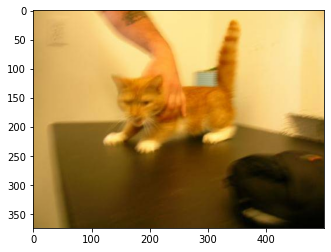

In [13]:
#show cat image
plt.imshow(cat_img)

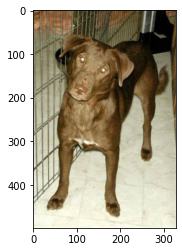

In [14]:
#show dog image
plt.imshow(dog_img)

**Let's decide on the final dimension of these images.**

In [15]:
cat_img.max()  # resimler scale edilmemiş

255

In [16]:
cat_img.min()  # resimler scale edilmemiş

0

In [17]:
cat_img.shape

(374, 500, 3)

In [18]:
dog_img.shape

(499, 327, 3)

In [19]:
# checking the sizes of the cat images

x = []
y = []

for image in os.listdir(train_path+'/cat'):    
    img = imread(train_path+'/cat/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

<IPython.core.display.Javascript object>

<AxesSubplot:>

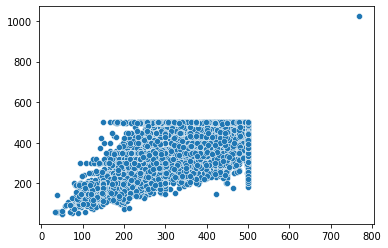

In [20]:
sns.scatterplot(x=x, y=y)

In [21]:
np.mean(x), np.median(x)

(356.46712, 374.0)

In [22]:
np.mean(y), np.median(y)

(410.52264, 470.0)

In [23]:
# decide on a shape to use it in your model as input shape.
# you can either use average shape size or try something different. 128*128 is preferred here
image_shape = (128,128,3)

In [ ]:
# help(ImageDataGenerator)

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [ ]:
#use ImageDataGenerator to manipulate the images

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

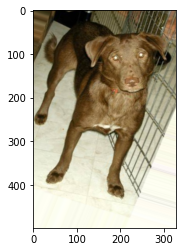

In [26]:
#show transfromed version of dog image
plt.imshow(image_gen.random_transform(dog_img))

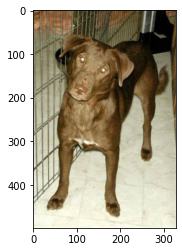

In [27]:
#show first version of dog image
plt.imshow(dog_img)

### Generating many manipulated images from a directory


flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

main_directory/

...class_a/

......a_image_1.jpg

......a_image_2.jpg

...class_b/

......b_image_1.jpg

......b_image_2.jpg

[bağlantı metni](https://drive.google.com/file/d/1ntiw1WnsWq5en96zRQmWADFxoCKS4DNc/view?usp=sharing)

image_gen.flow_from_directory(train_path)

In [28]:
image_gen.flow_from_directory(val_path)

Found 2290 images belonging to 2 classes.


In [29]:
image_gen.flow_from_directory(test_path)
# test datasında klasörler yok sadece resimler mevcut

Found 0 images belonging to 0 classes.


In [30]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


# Creating the Model

In [31]:
#create your CNN model here

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 activation (Activation)     (None, 61, 61, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3

## Early Stopping

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [36]:
batch_size = 16

In [ ]:
#use image_gen from above and read images from train and test set

In [37]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2], # image_shape = (128,128,3)
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary', shuffle=True, seed=42)

Found 17526 images belonging to 2 classes.


In [38]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary', shuffle=True, seed=42)

Found 2290 images belonging to 2 classes.


In [39]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=False, seed=42)

Found 0 images belonging to 0 classes.


In [40]:
# show class indices in train set
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [41]:
# show class indices in validation set
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [42]:
# there are no class indices in test set
test_image_gen.class_indices

{}

## Model Training

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
STEP_SIZE_TRAIN = train_image_gen.n//train_image_gen.batch_size
STEP_SIZE_VAL = val_image_gen.n//val_image_gen.batch_size
STEP_SIZE_TEST = test_image_gen.n//test_image_gen.batch_size

In [45]:
STEP_SIZE_TRAIN, STEP_SIZE_VAL, STEP_SIZE_TEST

(1095, 143, 0)

In [46]:
# fit your model using train and validation set

results = model.fit(train_image_gen,epochs=15,
                    validation_data=val_image_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_steps=STEP_SIZE_VAL,
                    callbacks=[early_stop])

Epoch 1/15
1095/1095 [==============================] - 346s 315ms/step - loss: 0.5803 - accuracy: 0.7182 - val_loss: 0.6712 - val_accuracy: 0.6163
Epoch 2/15
1095/1095 [==============================] - 309s 282ms/step - loss: 0.5094 - accuracy: 0.7587 - val_loss: 0.6549 - val_accuracy: 0.6652
Epoch 3/15
1095/1095 [==============================] - 311s 284ms/step - loss: 0.4711 - accuracy: 0.7837 - val_loss: 0.5425 - val_accuracy: 0.7421
Epoch 4/15
1095/1095 [==============================] - 310s 283ms/step - loss: 0.4458 - accuracy: 0.7953 - val_loss: 0.6620 - val_accuracy: 0.6761
Epoch 5/15
1095/1095 [==============================] - 311s 284ms/step - loss: 0.4225 - accuracy: 0.8118 - val_loss: 0.5739 - val_accuracy: 0.7190
Epoch 6/15
1095/1095 [==============================] - 310s 283ms/step - loss: 0.4108 - accuracy: 0.8182 - val_loss: 0.6531 - val_accuracy: 0.7207
Epoch 7/15
1095/1095 [==============================] - 308s 281ms/step - loss: 0.3940 - accuracy: 0.8225 - val_

# Evaluating the Model

In [47]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.580293,0.718161,0.671250,0.616259
1,0.509426,0.758709,0.654862,0.665210
2,0.471146,0.783724,0.542466,0.742133
3,0.445783,0.795317,0.662041,0.676136
4,0.422495,0.811822,0.573931,0.718969


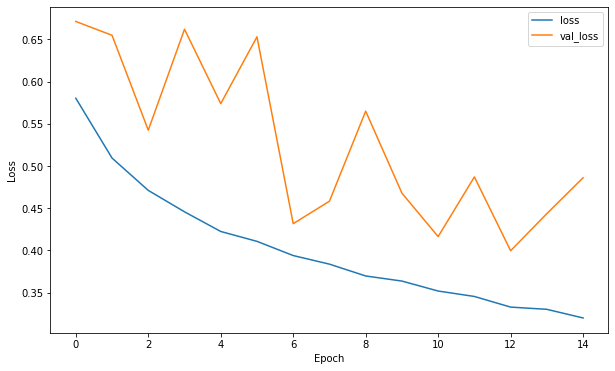

In [48]:
plt.figure(figsize=(10,6))
plt.plot(losses.loss, label="loss")
plt.plot(losses.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

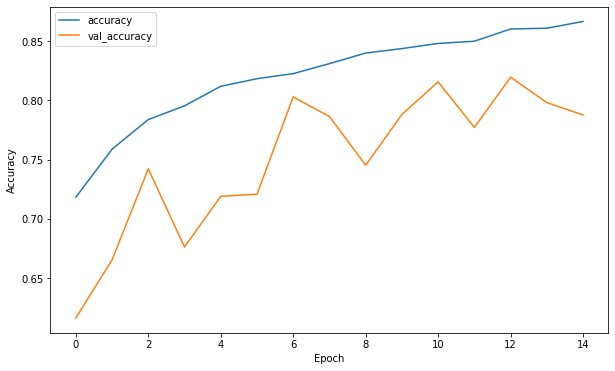

In [49]:
plt.figure(figsize=(10,6))
plt.plot(losses.accuracy, label="accuracy")
plt.plot(losses.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [50]:
model.metrics_names

['loss', 'accuracy']

In [51]:
model.evaluate(val_image_gen, steps=STEP_SIZE_VAL)

143/143 [==============================] - 23s 157ms/step - loss: 0.4799 - accuracy: 0.7911


[0.4799163341522217, 0.7910839319229126]

In [52]:
model.evaluate_generator(val_image_gen)

[0.4647715091705322, 0.800873339176178]

In [53]:
from tensorflow.keras.preprocessing import image

In [54]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary', shuffle=False, seed=42)
# shuffle=False olarak değiştirildi

Found 2290 images belonging to 2 classes.


In [55]:
pred_probabilities = model.predict(val_image_gen)

In [56]:
pred_probabilities

array([[0.00914857],
       [0.21934915],
       [0.08261225],
       ...,
       [0.98205876],
       [0.98900205],
       [0.9920132 ]], dtype=float32)

In [57]:
val_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [58]:
predictions = pred_probabilities > 0.5

In [59]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1219
           1       0.90      0.60      0.72      1071

    accuracy                           0.78      2290
   macro avg       0.81      0.77      0.77      2290
weighted avg       0.81      0.78      0.77      2290



In [63]:
confusion_matrix(val_image_gen.classes,predictions)

array([[1149,   70],
       [ 430,  641]], dtype=int64)

In [64]:
from tensorflow.keras.models import load_model
model.save('cat_dog_detector.h5')

# Predicting on an Image

In [65]:
from PIL import Image
from tensorflow.keras.preprocessing import image

In [66]:
model=load_model('cat_dog_detector.h5')

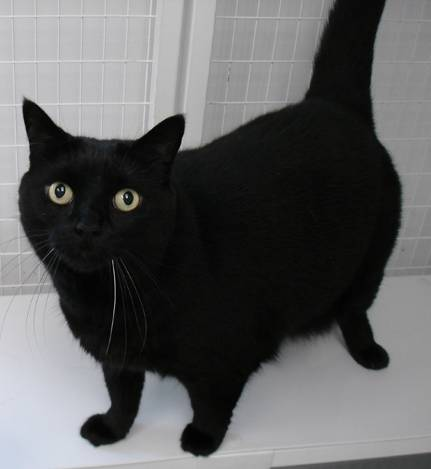

In [67]:
# read 2749.jpg from test set

img = image.load_img(test_path+"/2749.jpg") 
img   

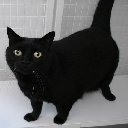

In [68]:
# resize it as 128 * 128

img = image.load_img(test_path+"/2749.jpg", target_size=image_shape)
img

# resized_img = img.resize((128, 128))

In [70]:
# turn the image into numpy array

img_array = np.array(img)   # img_array = image.img_to_array(img)
img_array.shape

(128, 128, 3)

In [71]:
# reshape

img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 128, 128, 3)

In [72]:
# predict the image class with your model

model.predict(img_array)

array([[0.]], dtype=float32)

In [73]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [74]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}